<a href="https://colab.research.google.com/github/hiaddi1998/ML-LAB-PROGRAM/blob/main/Walmart%20Sale%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import files
uploaded = files.upload()
train=pd.read_csv('train.csv')
from google.colab import files
uploaded = files.upload()
test=pd.read_csv('test.csv')
from google.colab import files
uploaded = files.upload()
store=pd.read_csv('stores.csv')
from google.colab import files
uploaded = files.upload()
feature=pd.read_csv('features.csv')

Saving train.csv to train (1).csv


Saving test.csv to test.csv


Saving stores.csv to stores.csv


Saving features.csv to features.csv


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
merge_df=pd.merge(train,feature, on=['Store','Date'], how='inner')

In [10]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [11]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,44724.0,2.763304,1.326682,1.000,2.0000,3.00000,4.000000,5.000000
Dept,44724.0,40.945085,29.392017,1.000,17.0000,33.00000,60.000000,99.000000
Weekly_Sales,44723.0,19655.597798,28997.440792,-1098.000,2475.5850,8123.57000,23938.755000,385051.040000
Temperature,44724.0,67.529116,14.997694,28.840,56.2300,69.24000,80.780000,93.340000
Fuel_Price,44724.0,3.218063,0.423410,2.514,2.7590,3.29000,3.594000,3.907000
MarkDown1,15986.0,7401.348813,7938.696490,41.740,2725.3600,5669.21000,9667.500000,75149.790000
MarkDown2,12886.0,3362.128823,10615.214790,-10.980,30.7000,142.30000,1594.870000,92523.940000
MarkDown3,14989.0,1432.069341,9215.474064,0.040,4.9700,28.16000,101.640000,83340.330000
MarkDown4,15713.0,3491.165523,6125.952892,4.000,500.6200,1579.67000,3915.290000,48159.860000
MarkDown5,15986.0,4754.250372,4532.154786,135.160,1940.5400,3841.61000,6149.040000,36430.330000


In [12]:
from datetime import datetime as dt

In [13]:
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: DateTimeObj, dtype: datetime64[ns]

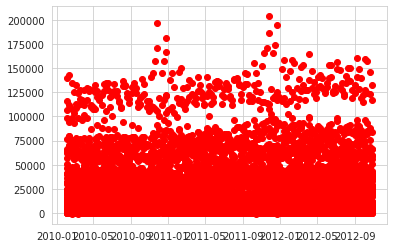

In [14]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [15]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [16]:
weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1       3219405.18
       2       6592598.93
       3       1880518.36
       4       5285874.09
       5       3468885.58
Name: Weekly_Sales, dtype: float64

In [17]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [18]:
walmartstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmartstore.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [19]:
walmartstoredf = walmartstore.iloc[:, list(range(5)) + list(range(10,13))]

In [20]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [21]:
walmartstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartstoredf['Date'])]
weekNo=walmartstoredf.reset_index()

In [22]:
weekNo = [(x - walmartstoredf['DateTimeObj'][0]) for x in list(walmartstoredf['DateTimeObj'])]

In [23]:
walmartstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]

In [24]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0


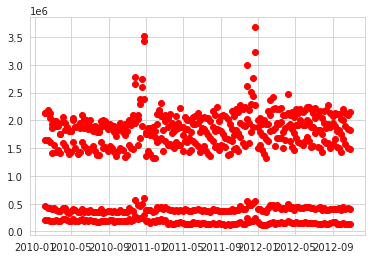

In [25]:
plt.plot(walmartstoredf.DateTimeObj, walmartstoredf.Weekly_Sales, 'ro')
plt.show()

In [26]:
walmartstoredf['IsHolidayInt'] = [int(x) for x in list(walmartstoredf.IsHoliday)]

In [27]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0


In [28]:
walmartstoredf.Store.unique()

array([1, 2, 3, 4, 5])

In [29]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)

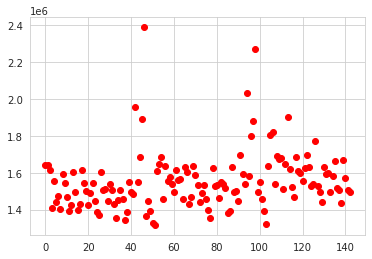

In [30]:
plt.plot(walmartstoredf[(walmartstoredf.Store==1)].Week, walmartstoredf[(walmartstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [31]:
XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [32]:
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [33]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
wmLinear.coef_

array([  -4542.4414408 , -300394.28005529,  -20317.06551098,
        597722.84757284,   13382.37432242,  -29167.46020838])

In [35]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)

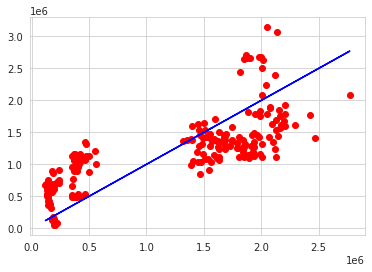

In [36]:
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [37]:
walmartstoredf['Store'].unique()

array([1, 2, 3, 4, 5])

In [38]:
Store_Dummies = pd.get_dummies(walmartstoredf.Store, prefix='Store').iloc[:,1:]
walmartstoredf = pd.concat([walmartstoredf, Store_Dummies], axis=1)

In [39]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0,0,0,0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1,0,0,0,0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0,0,0,0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0,0,0,0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0,0,0,0,0


In [40]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales

In [41]:
XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5
28,86.65,2.664,211.603363,7.787,28.0,0,0,0,0,0
43,49.27,2.708,211.607193,7.838,43.0,0,0,0,0,0
42,64.52,2.735,211.748433,7.838,42.0,1,0,0,0,0
73,85.55,3.524,215.184137,7.962,73.0,0,0,0,0,0
167,87.66,2.608,210.892132,8.099,24.0,0,1,0,0,0


In [42]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

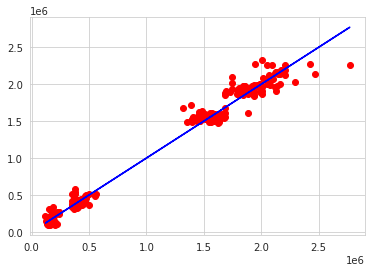

In [43]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [44]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

0.11869645667281016 12092735198.664907


In [ ]:
# Dimensionality Reduction

In [45]:
from sklearn.linear_model import Lasso

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
alphas = np.linspace(10, 20, 10)

In [48]:
testError = np.empty(10)

for i, alpha in enumerate(alphas) :
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))

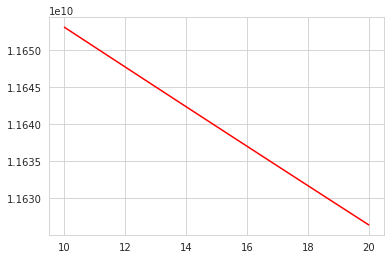

In [49]:
plt.plot(alphas, testError, 'r-')
plt.show()

In [50]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [52]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)

Lasso(alpha=17, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)